# Clustering Analysis

In this notebook we want to find out which customer groups exist. For this purpose we use clustering methods.

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

la_2018_set = pd.read_pickle("Data/la_2018_set.pickle")
feature_set = pd.read_pickle("Data/feature_set.pickle")
feature_set_daily = pd.read_pickle("Data/feature_set_daily.pickle")
la_2018_extension = pd.read_pickle("Data/la_2018_extension.pickle")

In [524]:
k_max = 10  # more than 10 clusters are definitely
            # not reasonable!

In [525]:
la_2018_set.head()

,start_time,end_time,start_station,end_station,bike_id,user_type,hour,week_day,day,month,trip_id,duration,start_coordinates,end_coordinates,distance,km/h,bike_type
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,0,0,01/01/2018,1,65406367,21,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.6,standard
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,0,0,01/01/2018,1,65406366,20,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.7,standard
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,0,0,01/01/2018,1,65406365,19,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.9,standard
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,0,0,01/01/2018,1,65406364,22,"(34.0437, -118.2601)","(34.0447, -118.2524)",0.72,2.0,standard
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,0,0,01/01/2018,1,65406362,45,"(33.9884, -118.4516)","(34.0234, -118.4796)",4.67,6.2,standard


## Demand for each Station 

In [526]:
#la_2018_set.drop(columns =["day"], axis=1)
hour_set= pd.DataFrame()
hour_set["hour"]= la_2018_set["hour"]
hour_set["duration"]= la_2018_set["duration"]
hour_set["station"]= la_2018_set["start_station"]
hour_set.head()

,hour,duration,station
0,0,21,3063
1,0,20,3063
2,0,19,3063
3,0,22,3018
4,0,45,4204


In [527]:
transf= pd.DataFrame()
transf["station"]=hour_set["station"]
transf["hour"]=hour_set["hour"]
transf.head()
transf=pd.DataFrame(transf.groupby(["station"]).sum())
transf= transf.reset_index()
transf["index"]= list(range(132))
transf=transf.drop(columns =["hour"], axis=1)
transf.head()

,station,index
0,3000,0
1,3005,1
2,3006,2
3,3007,3
4,3008,4


In [528]:
feature_set = pd.DataFrame(hour_set.join(transf.set_index ("station"), on="station", how="left"))
feature_set=feature_set.drop(columns =["station"], axis=1)
feature_set.rename(columns = {'index':'station'}, inplace = True)
feature_set.head()

,hour,duration,station
0,0,21,45
1,0,20,45
2,0,19,45
3,0,22,10
4,0,45,105


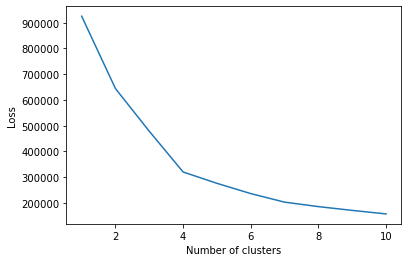

(0.0, 6.0)

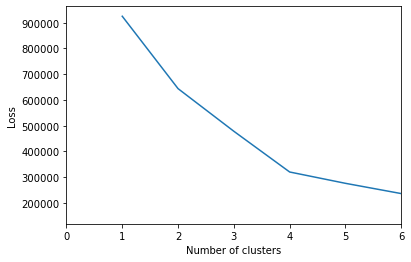

In [529]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_set)
X_scaled = scaler.transform(feature_set)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_set.columns, index=feature_set.index)
X_scaled_df.head()

k_max=10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [530]:
# refit algorithm
two_means = KMeans(n_clusters=4)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

array([3, 3, 3, ..., 2, 1, 1], dtype=int32)

In [531]:
feature_set.head()

,hour,duration,station
0,0,21,45
1,0,20,45
2,0,19,45
3,0,22,10
4,0,45,105


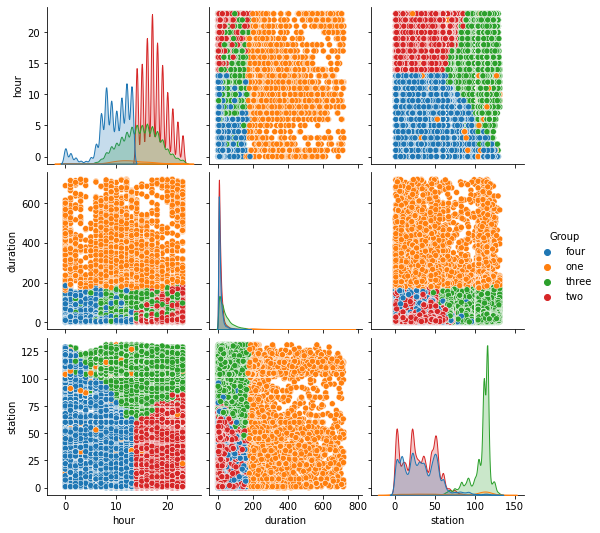

In [532]:
numbers = [ "one", "two", "three", "four"]

feature_set["Group"] = two_means.predict(X_scaled)
feature_set["Group"] = feature_set["Group"].apply(lambda x: numbers[x])
sns.pairplot(data=feature_set, hue="Group")

## Demand per Latitude

In [533]:
feature_set.head()

,hour,duration,station,Group
0,0,21,45,four
1,0,20,45,four
2,0,19,45,four
3,0,22,10,four
4,0,45,105,four


In [534]:
la_2018_extension2 = pd.DataFrame()
la_2018_extension2["start_lat"] =la_2018_extension["start_lat"]
la_2018_extension2["trip_id"] =la_2018_extension["trip_id"]
la_2018_extension2.head()

,start_lat,trip_id
0,34.049198,65406367
1,34.049198,65406366
2,34.049198,65406365
3,34.043732,65406364
4,33.988419,65406362


In [535]:
feature_set = pd.DataFrame(la_2018_extension2.join(la_2018_set.set_index ("trip_id"), on="trip_id", how="right"))
feature_set.dropna(inplace=True)
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308030 entries, 0 to 311893
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_lat          308030 non-null  float64       
 1   trip_id            308030 non-null  int64         
 2   start_time         308030 non-null  datetime64[ns]
 3   end_time           308030 non-null  datetime64[ns]
 4   start_station      308030 non-null  int64         
 5   end_station        308030 non-null  int64         
 6   bike_id            308030 non-null  int64         
 7   user_type          308030 non-null  object        
 8   hour               308030 non-null  int64         
 9   week_day           308030 non-null  int64         
 10  day                308030 non-null  object        
 11  month              308030 non-null  int64         
 12  duration           308030 non-null  int64         
 13  start_coordinates  308030 non-null  object  

In [536]:
feature_set2=pd.DataFrame()
feature_set2["start_lat"]= feature_set["start_lat"]
feature_set2["duration"]= feature_set["duration"]
feature_set2["hour"]= feature_set["hour"]
feature_set2.head()

,start_lat,duration,hour
0,34.049198,21,0
1,34.049198,20,0
2,34.049198,19,0
3,34.043732,22,0
4,33.988419,45,0


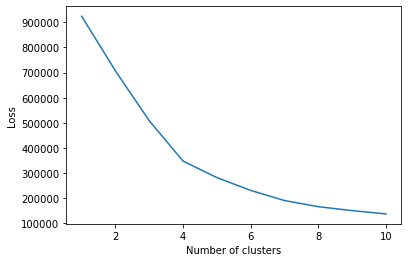

(0.0, 6.0)

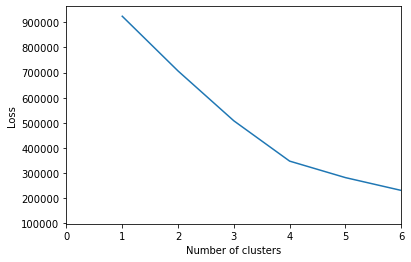

In [537]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_set2)
X_scaled = scaler.transform(feature_set2)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_set2.columns, index=feature_set2.index)
X_scaled_df.head()

k_max=10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [538]:
# refit algorithm
two_means = KMeans(n_clusters=4)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [539]:
numbers = [ "one", "two", "three", "four"]

feature_set2["Group"] = two_means.predict(X_scaled)
feature_set2["Group"] = feature_set2["Group"].apply(lambda x: numbers[x])

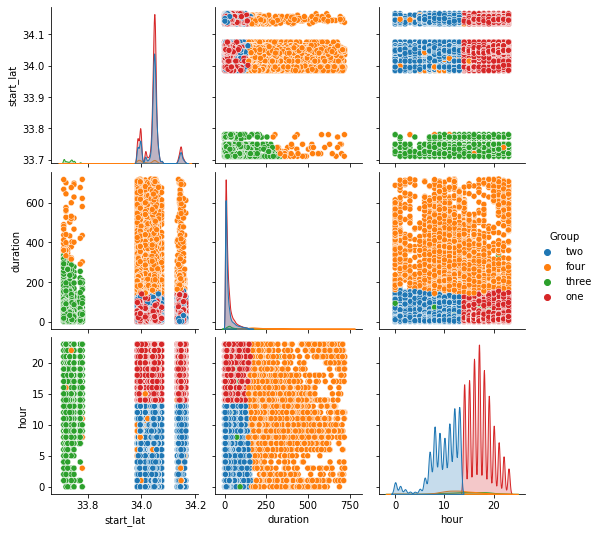

In [540]:
sns.pairplot(data=feature_set2, hue="Group")

## Demand compared to Center

In [541]:
feature_set2["is_center"]= feature_set2["start_lat"]
feature_set2["is_center"]= feature_set2["is_center"].apply(lambda x: 1 if x<34.15 and x>33.9 else 0)
feature_set2.head()

,start_lat,duration,hour,Group,is_center
0,34.049198,21,0,two,1
1,34.049198,20,0,two,1
2,34.049198,19,0,two,1
3,34.043732,22,0,two,1
4,33.988419,45,0,two,1


In [542]:
feature_set3 =pd.DataFrame()
feature_set3= feature_set2.copy()
feature_set3= feature_set3.drop(columns =["start_lat"], axis=1)
feature_set3.head()

,duration,hour,Group,is_center
0,21,0,two,1
1,20,0,two,1
2,19,0,two,1
3,22,0,two,1
4,45,0,two,1


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


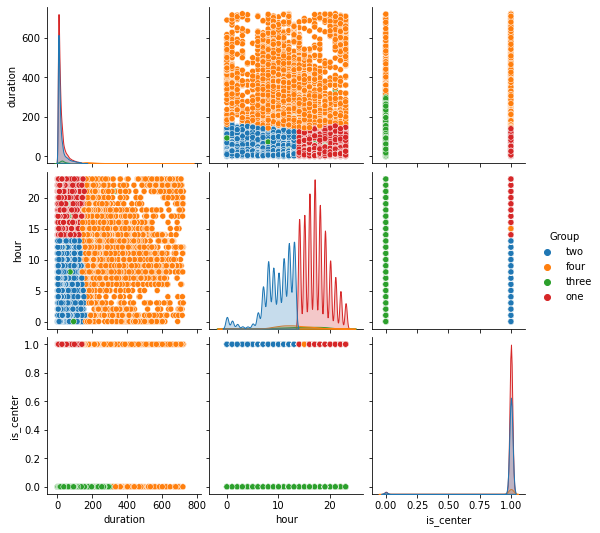

In [543]:
sns.pairplot(data=feature_set3, hue="Group")

## Demand for Center

In [544]:
#sort = feature_set3.sort_values("is_center", axis = 0, ascending = False)
center=pd.DataFrame()
center = feature_set3[feature_set3.is_center != 0]
center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296567 entries, 0 to 311893
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   duration   296567 non-null  int64 
 1   hour       296567 non-null  int64 
 2   Group      296567 non-null  object
 3   is_center  296567 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 11.3+ MB


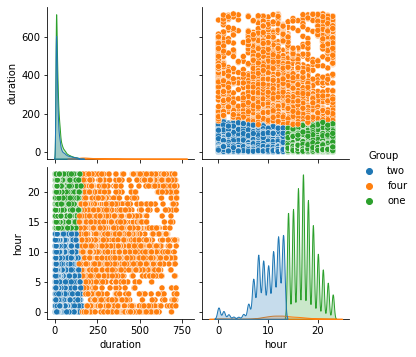

In [545]:
center= center.drop(columns =["is_center"], axis=1)
sns.pairplot(data=center, hue="Group")

In [546]:
center.mean()

duration    28.787748
hour        14.069721
dtype: float64

## Demand for No Center

In [547]:
no_center= pd.DataFrame()
no_center = feature_set3[feature_set3.is_center != 1]
no_center= no_center.drop(columns =["is_center"], axis=1)
no_center.head()

,duration,hour,Group
71,19,5,two
74,25,5,two
75,28,5,two
77,186,6,four
84,13,6,two


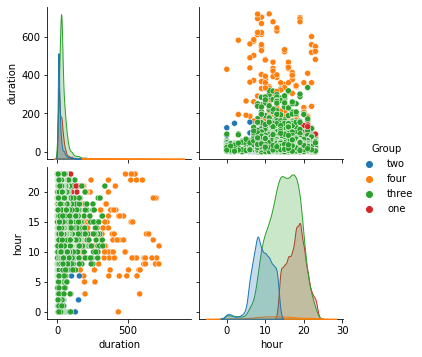

In [548]:
sns.pairplot(data=no_center, hue="Group")

In [549]:
no_center.mean()

duration    35.506150
hour        14.313618
dtype: float64